In [16]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from config import api_key

In [17]:
# adding API results to a dataframe

url = 'https://api.yelp.com/v3/businesses/search'
headers = {'Authorization': f'Bearer {api_key}'}
params = {
    'latitude': 36.1627,
    'longitude': -86.7816,
    'radius': 5000,
    'categories': 'restaurants',
    'limit': 50
}

response = requests.get(url, headers=headers, params=params)

# creating empty lists for data frame
results = {'Name': [], 'Rating': [], 'Pricing': [], 'Number of Reviews': []}

# Check if the response was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json().get('businesses', [])
    
    # Loop through each restaurant
    for d in data:
        results['Name'].append(d['name'])
        results['Rating'].append(d['rating'])
        # Check if 'price' key exists in the data
        if 'price' in d:
            results['Pricing'].append(len(d['price']))
        else:
            results['Pricing'].append('N/A')
        results['Number of Reviews'].append(d['review_count'])
        
restaurant_info_df = pd.DataFrame(results)
restaurant_info_df

restaurant_info_df.to_csv('restaurant-info.csv', index=False)

In [18]:
# creating dataframe of restaurant categories
category_results = {'Name': [], 'Category': []}

# Check if the response was successful
if response.status_code == 200:

    # Loop through each restaurant
    for d in data:
        category_results['Name'].append(d['name'])
        category_results['Category'].append(d['categories'][0]['title'])
        
category_df = pd.DataFrame(category_results)
category_df

category_df.to_csv('restaurant-categories.csv', index=False)


In [19]:
# printing API results

url = 'https://api.yelp.com/v3/businesses/search'
headers = {'Authorization': f'Bearer {api_key}'}
params = {
    'latitude': 36.1627,
    'longitude': -86.7816,
    'radius': 1000,
    'categories': 'restaurants',
    'limit': 50
}

response = requests.get(url, headers=headers, params=params)

# Check if the response was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json().get('businesses', [])
    
    # Loop through each restaurant
    for d in data:
        print("Restaurant: {}".format(d['name']))
        print("Rating: {}".format(d['rating']))
        # Check if 'price' key exists in the data
        if 'price' in d:
            print("Pricing: {}".format(len(d['price'])))
        else:
            print("Pricing data not available")
        print("Reviews: {}".format(d['review_count']))
        print()
else:
    # Print error message if the response was not successful
    print("Error:", response.status_code)

Restaurant: The Stillery
Rating: 4.4
Pricing: 2
Reviews: 3424

Restaurant: Puckett's Restaurant - Nashville
Rating: 3.9
Pricing: 2
Reviews: 3290

Restaurant: Sixty Vines
Rating: 4.5
Pricing: 2
Reviews: 944

Restaurant: Skull's Rainbow Room
Rating: 4.5
Pricing: 3
Reviews: 1331

Restaurant: The Twelve Thirty Club
Rating: 4.3
Pricing data not available
Reviews: 789

Restaurant: Boqueria Fifth + Broadway
Rating: 3.9
Pricing: 2
Reviews: 176

Restaurant: Deacon's New South
Rating: 4.1
Pricing: 3
Reviews: 343

Restaurant: The Standard At The Smith House
Rating: 4.3
Pricing: 3
Reviews: 368

Restaurant: Stateside Kitchen
Rating: 4.1
Pricing data not available
Reviews: 323

Restaurant: etch
Rating: 4.5
Pricing: 3
Reviews: 1699

Restaurant: Ellington's Restaurant
Rating: 3.9
Pricing: 3
Reviews: 146

Restaurant: Blanco Cocina + Cantina
Rating: 4.5
Pricing: 2
Reviews: 334

Restaurant: Hattie B’s Hot Chicken - Nashville - Lower Broadway
Rating: 4.4
Pricing: 2
Reviews: 814

Restaurant: Blue Sushi Sak

In [20]:
# The JSON format of the restaurant data we're pulling
data

[{'id': 'xlMQBBt9wrtahdqiRDcVSg',
  'alias': 'the-stillery-nashville',
  'name': 'The Stillery',
  'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/2Y37UzeRQrrpSS6VUJKGuw/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/the-stillery-nashville?adjust_creative=IWWVRau9K-S_EiFf9cGUSQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=IWWVRau9K-S_EiFf9cGUSQ',
  'review_count': 3424,
  'categories': [{'alias': 'newamerican', 'title': 'New American'},
   {'alias': 'bars', 'title': 'Bars'}],
  'rating': 4.4,
  'coordinates': {'latitude': 36.16225, 'longitude': -86.7757},
  'transactions': ['delivery'],
  'price': '$$',
  'location': {'address1': '113 2nd Ave N',
   'address2': '',
   'address3': '',
   'city': 'Nashville',
   'zip_code': '37201',
   'country': 'US',
   'state': 'TN',
   'display_address': ['113 2nd Ave N', 'Nashville, TN 37201']},
  'phone': '+16159428080',
  'display_phone': '(615) 942-8080',
  'distance': 530.9636373725139},
 {'id': '

In [21]:
Nashville_Restaurant=pd.read_csv("nashville-restaurant-categories.csv")
Portland_Resaurant=pd.read_csv("portland-restaurant-categories.csv")
Franklin_Resaurant=pd.read_csv("franklin-restaurant-categories.csv")

In [22]:
# Add a column 'Location' to each DataFrame to distinguish between Nashville and Portland data
Nashville_Restaurant['Location'] = 'Nashville'
Portland_Resaurant['Location'] = 'Portland'

# Concatenate the two DataFrames
merged_data = pd.merge(Nashville_Restaurant, Portland_Resaurant, how='outer')

merged_data

,Name,Category,Location
0,The Stillery,New American,Nashville
1,Puckett's Restaurant - Nashville,American,Nashville
2,Sixty Vines,New American,Nashville
3,etch,New American,Nashville
4,The Twelve Thirty Club,Cocktail Bars,Nashville
...,...,...,...
88,Cracker Barrel Old Country Store,Breakfast & Brunch,Portland
89,Burger King,Burgers,Portland
90,Jims Barbeque,Barbeque,Portland
91,Quiznos,Sandwiches,Portland


In [23]:
Franklin_Resaurant['Location']="Franklin"

restaurant_Category=pd.merge(merged_data, Franklin_Resaurant, how='outer')

restaurant_Category

,Name,Category,Location
0,The Stillery,New American,Nashville
1,Puckett's Restaurant - Nashville,American,Nashville
2,Sixty Vines,New American,Nashville
3,etch,New American,Nashville
4,The Twelve Thirty Club,Cocktail Bars,Nashville
...,...,...,...
138,Wild Ginger Restaurant,Asian Fusion,Franklin
139,Coal Town Public House,New American,Franklin
140,Ice Point Cafe,Bubble Tea,Franklin
141,House of India,Indian,Franklin


In [24]:
nashville_info=pd.read_csv("nashville-restaurant-info.csv")
portland_info=pd.read_csv("portland-restaurant-info.csv")
franklin_info=pd.read_csv("franklin-restaurant-info.csv")

In [25]:
# Add a column 'Location' to each DataFrame to distinguish between Nashville and Portland data
nashville_info['Location'] = 'Nashville'
portland_info['Location'] = 'Portland'

# Concatenate the two DataFrames
merged_data2= pd.merge(nashville_info,portland_info, how='outer')

merged_data2

,Name,Rating,Pricing,Number of Reviews,Location
0,The Stillery,4.4,2.0,3424,Nashville
1,Puckett's Restaurant - Nashville,3.9,2.0,3288,Nashville
2,Sixty Vines,4.5,2.0,944,Nashville
3,etch,4.5,3.0,1699,Nashville
4,The Twelve Thirty Club,4.3,NaN,788,Nashville
...,...,...,...,...,...
88,Burger King,3.2,1.0,11,Portland
89,McDonald's,1.6,1.0,32,Portland
90,Jims Barbeque,5.0,NaN,1,Portland
91,Quiznos,1.2,NaN,6,Portland


In [26]:
franklin_info['Location']="Franklin"

restaurant_info=pd.merge(merged_data2,franklin_info, how='outer')

restaurant_info

,Name,Rating,Pricing,Number of Reviews,Location
0,The Stillery,4.4,2.0,3424,Nashville
1,Puckett's Restaurant - Nashville,3.9,2.0,3288,Nashville
2,Sixty Vines,4.5,2.0,944,Nashville
3,etch,4.5,3.0,1699,Nashville
4,The Twelve Thirty Club,4.3,NaN,788,Nashville
...,...,...,...,...,...
138,Wild Ginger Restaurant,4.1,2.0,544,Franklin
139,Coal Town Public House,4.0,2.0,65,Franklin
140,Ice Point Cafe,4.6,2.0,137,Franklin
141,House of India,4.6,2.0,637,Franklin


In [31]:
# Merged data of both csv files
merged_info_category = pd.merge(restaurant_info, restaurant_Category, how='outer')

merged_info_category.to_csv('merged_info_category.csv', index=False)


In [30]:
#cvs of both dataframes
restaurant_Category.to_csv('restaurant_Category.csv', index=False)
restaurant_info.to_csv('restaurant_info.csv', index=False)

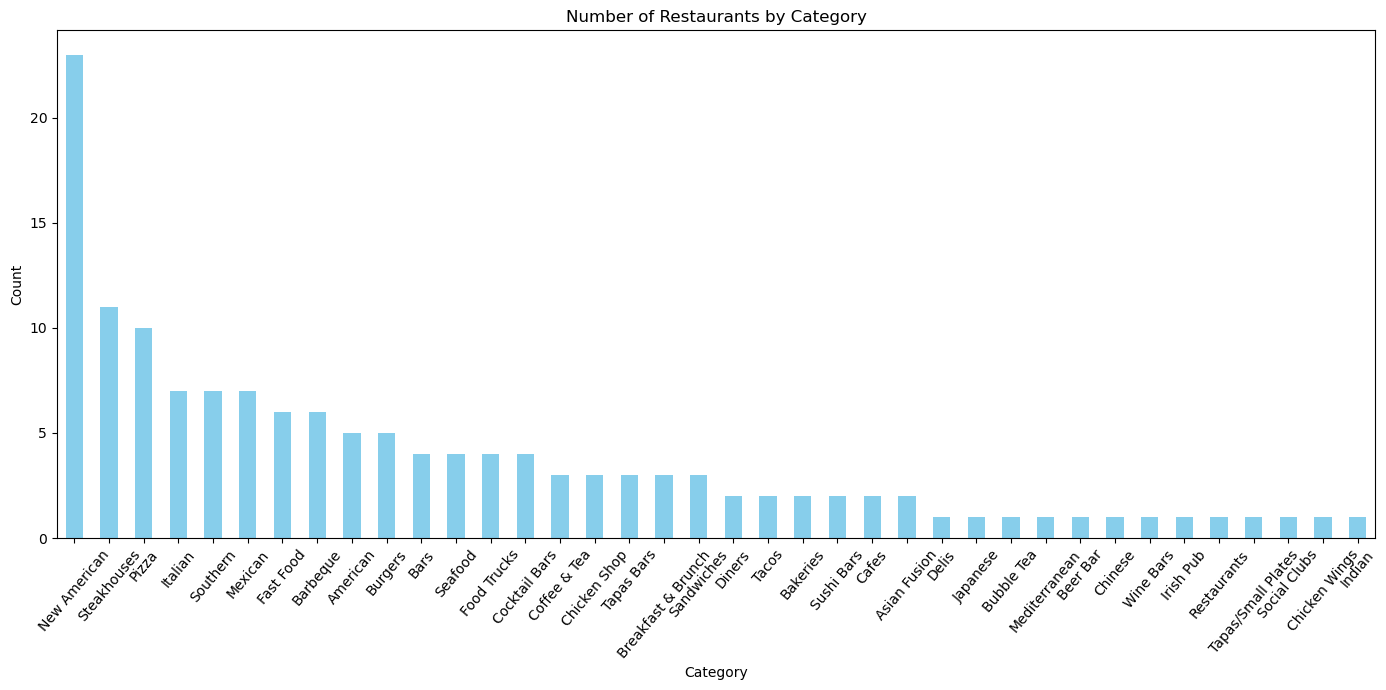

In [27]:
category_counts = restaurant_Category['Category'].value_counts()

# Plotting
plt.figure(figsize=(14, 7))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Restaurants by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

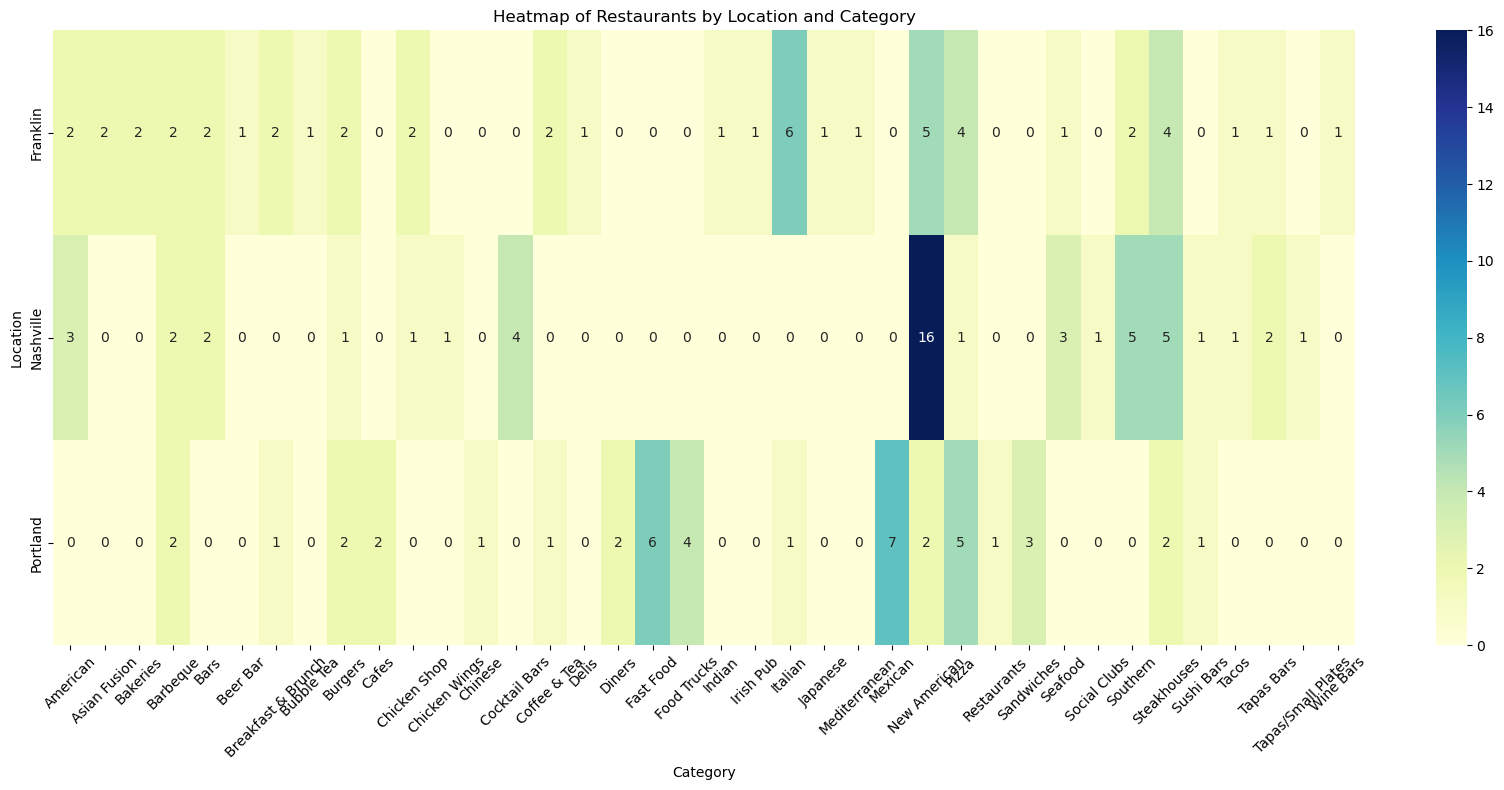

In [28]:
import seaborn as sns
pivot_table = restaurant_Category.pivot_table(index='Location', columns='Category', aggfunc='size', fill_value=0)

# Plotting
plt.figure(figsize=(17, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Restaurants by Location and Category')
plt.xlabel('Category')
plt.ylabel('Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()